Розв'язок:
x = 1.145
y = 0.045
Перевірка розв'язку:
x = 1.184
y = -0.685
Розв'язок методом простої ітерації:
x = -0.138
y = 0.538
Кількість ітерацій: 16


<ipython-input-3-083f7148f428>:65: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(X, Y, eq1, levels=[0], colors='red', label='x = sin(y+0.5) - 1')
<ipython-input-3-083f7148f428>:66: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(X, Y, eq2, levels=[0], colors='blue', label='y = -cos(x-2)')


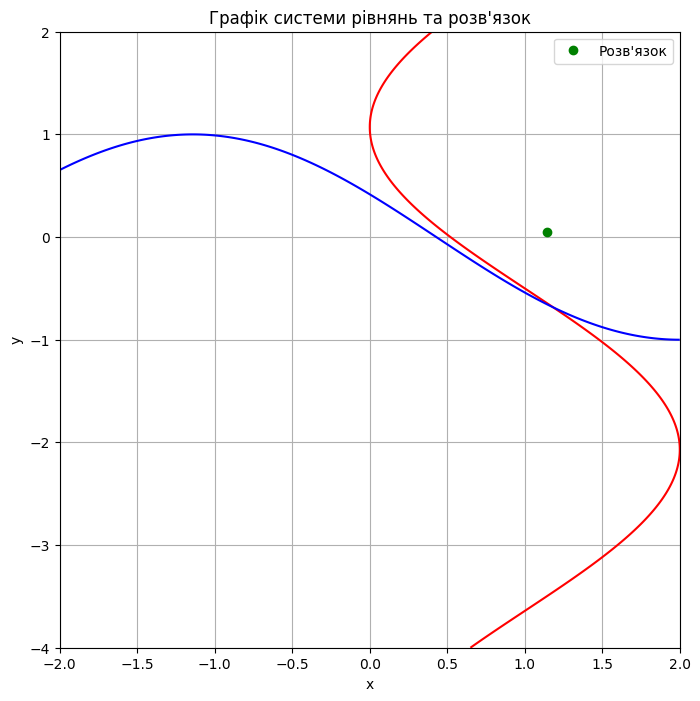

In [3]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

x0 = 0.0
y0 = 0.0
tolerance = 0.001

def equations(vars):
    x, y = vars
    eq1 = x - (2 - np.cos(y + 0.5))
    eq2 = 2*y - (1 - np.sin(x))
    return [eq1, eq2]

initial_guess = [0, 0]
solution = fsolve(equations, initial_guess)

def simple_iteration(x0, y0, tolerance):
    xn = x0
    yn = y0
    n = 0

    while True:
        xn1 = np.sin(yn + 0.5) - 1
        yn1 = -np.cos(xn - 2)
        n += 1

        if abs(xn1 - xn) < tolerance and abs(yn1 - yn) < tolerance:
            break

        xn = xn1
        yn = yn1

    return xn, yn, n

x, y, iterations = simple_iteration(x0, y0, tolerance)

def f3(x):
    return x[0] - (1 - np.sin(x[1] + 0.5)), x[1] + np.cos(x[0] - 2)

check_solution = fsolve(f3, [x, y])

print("Розв'язок:")
print(f"x = {solution[0]:.3f}")
print(f"y = {solution[1]:.3f}")

print("Перевірка розв'язку:")
print(f"x = {check_solution[0]:.3f}")
print(f"y = {check_solution[1]:.3f}")

print(f"Розв'язок методом простої ітерації:")
print(f"x = {x:.3f}")
print(f"y = {y:.3f}")
print(f"Кількість ітерацій: {iterations}")

x_min, x_max = -2, 2
y_min, y_max = -4, 2
x_range = np.linspace(x_min, x_max, 400)
y_range = np.linspace(y_min, y_max, 400)
X, Y = np.meshgrid(x_range, y_range)
eq1 = X - (1 - np.sin(Y + 0.5))
eq2 = Y + np.cos(X - 2)

fig, ax = plt.subplots(figsize=(8, 8))
ax.contour(X, Y, eq1, levels=[0], colors='red', label='x = sin(y+0.5) - 1')
ax.contour(X, Y, eq2, levels=[0], colors='blue', label='y = -cos(x-2)')
ax.plot(solution[0], solution[1], 'go', label='Розв\'язок')
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Графік системи рівнянь та розв\'язок')
ax.legend()
plt.grid(True)

plt.show()
